### Based on [Effective Matplotlib](http://pbpython.com/effective-matplotlib.html) by Chris Moffitt

In [11]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Download Data

In [6]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head(10)

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
5,714466,Trantow-Barrows,S2-77896,17,87.63,1489.71,2014-01-02 10:07:15
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
7,729833,Koepp Ltd,S1-30248,8,33.25,266.00,2014-01-03 06:32:11
8,714466,Trantow-Barrows,S1-50961,22,84.09,1849.98,2014-01-03 11:29:02
9,737550,"Fritsch, Russel and Anderson",S2-82423,14,81.92,1146.88,2014-01-03 19:07:37


Aggregate data into total sales and purchases for top 10 customers

In [9]:
top_10 = (df.groupby("name")["ext price", "quantity"].agg({"ext price": "sum", "quantity": "count"})
          .sort_values(by="ext price", ascending=False))[:10].reset_index()
top_10.rename(columns={"name": "Name", "ext price": "Sales",
                       "quantity": "Purchases"}, inplace=True)
top_10

,Name,Purchases,Sales
0,Kulas Inc,94,137351.96
1,White-Trantow,86,135841.99
2,Trantow-Barrows,94,123381.38
3,Jerde-Hilpert,89,112591.43
4,"Fritsch, Russel and Anderson",81,112214.71
5,Barton LLC,82,109438.50
6,Will LLC,74,104437.60
7,Koepp Ltd,82,103660.54
8,"Frami, Hills and Schmidt",72,103569.59
9,Keeling LLC,74,100934.30


Available plot styles

In [7]:
plt.style.available

['seaborn-darkgrid',
 'seaborn',
 'classic',
 'seaborn-muted',
 'seaborn-colorblind',
 'ggplot',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-deep',
 'bmh',
 'seaborn-ticks',
 'seaborn-dark',
 'grayscale',
 'seaborn-poster',
 'dark_background',
 'seaborn-bright',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-pastel',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-dark-palette',
 '_classic_test']

Choose pyplot style

In [17]:
plt.style.use("ggplot")

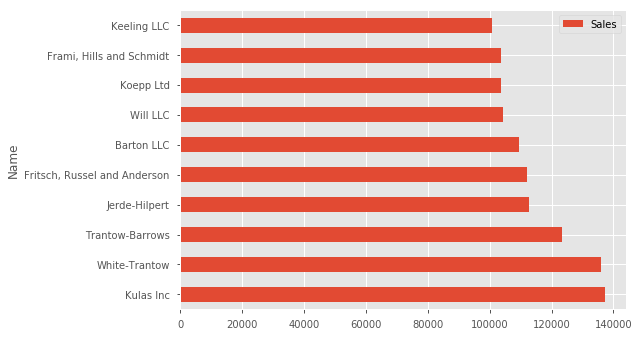

In [18]:
top_10.plot(kind="barh", y="Sales", x="Name")

Customize the plot

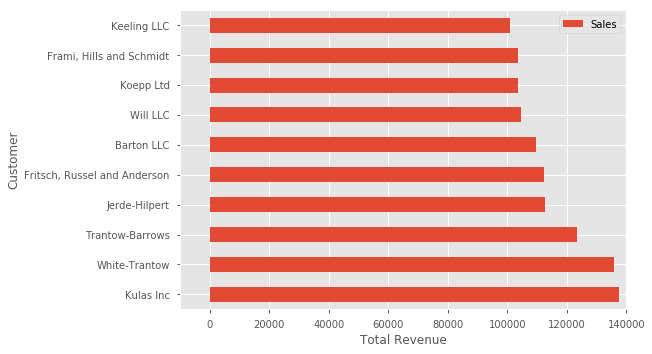

In [20]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Customer")

Adjust the size of the image

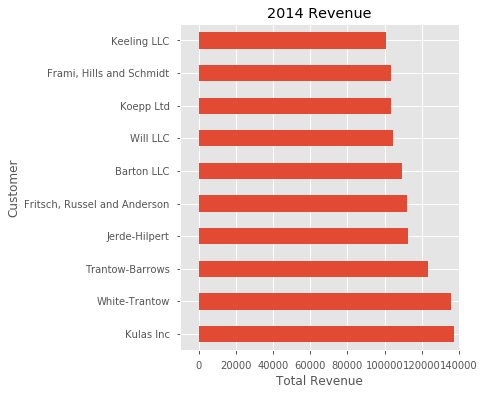

In [23]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")
ax.legend().set_visible(False)

Currency formatting function

In [22]:
def currency(value, tick_pos):
    """Currency formatter for USD in thousands and millions of 
    dollars."""
    if value >= 1000000:
        return "${:1.1f}M".format(value * 1e-6)
    return "${:1.0f}K".format(value * 1e-3)

Custom improved currency formatting

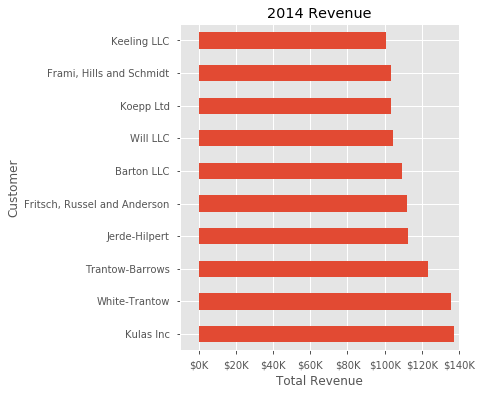

In [24]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")
formattter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formattter)
ax.legend().set_visible(False)

Adding new customer threshold line

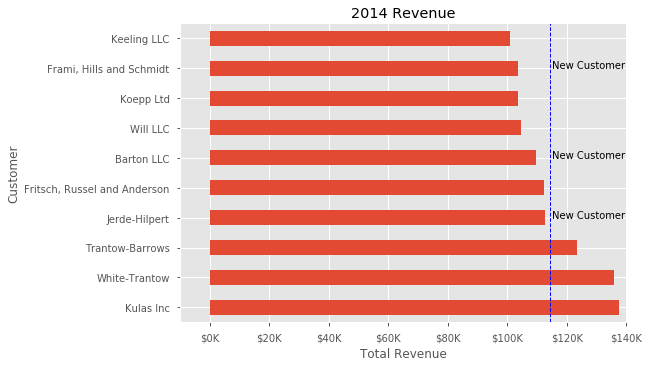

In [25]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

Multiple plots

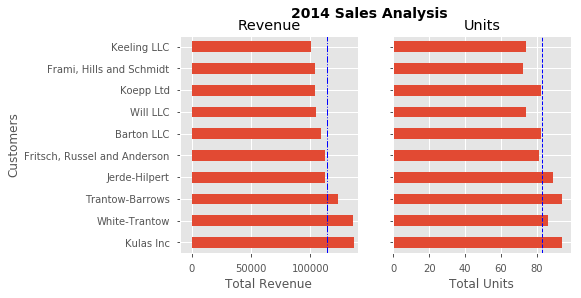

In [30]:
# sharey to have the two plots share the same y axis
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True,
                              figsize=(7, 4))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')
# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='-.', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

Available file types for saving figures and plots

In [31]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

In [32]:
# bbox_inches specifies bounding box size
fig.savefig("sales.svg", transparent=True, bbox_inches="tight")